# Análise de Dados do banco de dados Iris

Autores: Natanael Junior (natmourajr@lps.ufrj.br), Vinicius Mello (viniciusdsmello@poli.ufrj.br) e Pedro Lisboa (pedrohblisboa@gmail.com)

LPS - Laboratório de Processamento de Sinais
<center><img src="../data/logo_lps.jpg"></center>

### Carrega algumas bibliotecas de Python

Imprime um resumo de quanto tempo demorou para rodar a célula em questão
```python
%time
```

Carrega a biblioteca do sistema operacional
```python
import os
```

Carrega a biblioteca de computação numérica do python
```python
import numpy as np
```

Carrega a biblioteca Pandas (https://pandas.pydata.org), ótima ferramenta de análise de dados
```python
import pandas as pd
```

Carrega uma biblioteca MatplotLib (https://matplotlib.org), ótima ferramenta para a criação de gráficos
```python
import matplotlib.pyplot as plt
```

In [1]:
%time
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 0 ns


### Carga de dados do arquivo iris.csv

In [2]:
%time
df = pd.read_csv('../data/iris.csv')

Wall time: 0 ns


In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


```df.head(3)``` == ```df[:3]```

In [4]:
df['target'].unique()

array([0, 1, 2], dtype=int64)

### Estimar as funções densidade de probabilidade do banco de dados

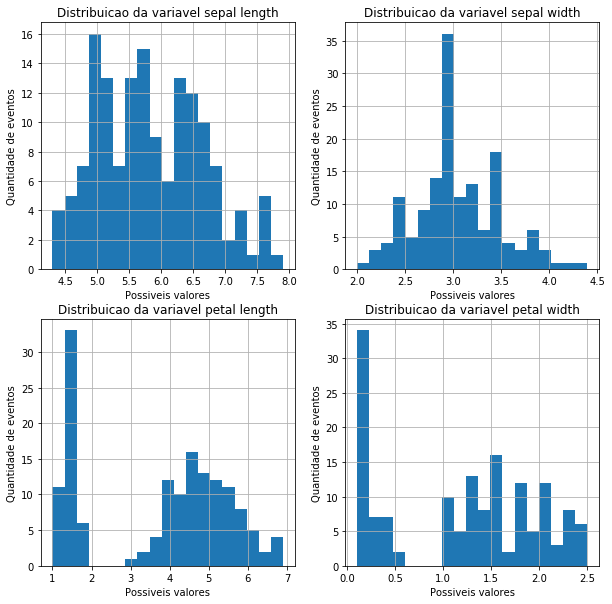

In [5]:
fig = plt.figure(figsize=(10,10))

data = df.drop(['target'],axis=1)

n_bins = 20

for index, feature in enumerate(data.columns):
    ax = plt.subplot(2,2,index+1)
    bins = np.linspace(data[feature].min(),data[feature].max(),n_bins)
    n, bins, patches = ax.hist(data[feature],bins=bins)
    ax.set_title('Distribuicao da variavel %s'%(feature.replace('_',' ')))
    ax.set_ylabel('Quantidade de eventos')
    ax.set_xlabel('Possiveis valores')
    ax.grid()


### Apresentar o boxplot das variáveis do banco de dados

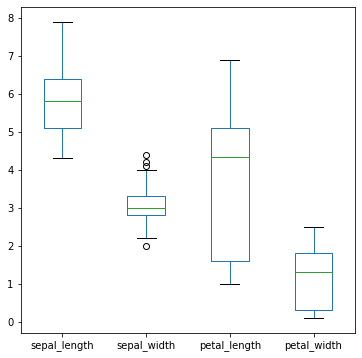

In [6]:
data = df.drop(['target'],axis=1)

data.plot.box(figsize=(6,6));

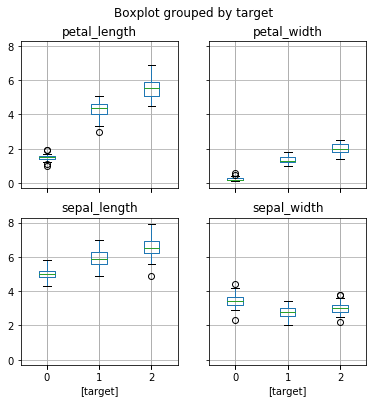

In [7]:
df.boxplot(by='target', figsize=(6,6));

### Estimar as funções densidade de probabilidade do banco de dados dividindo por classes

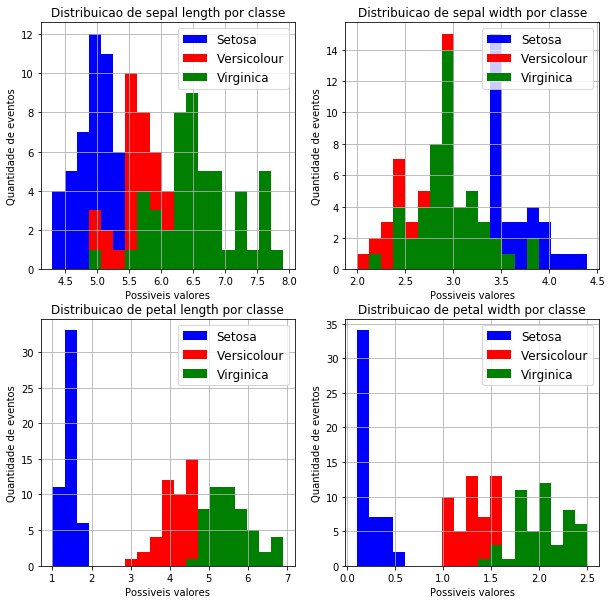

In [8]:
fig = plt.figure(figsize=(10,10))

data = df.drop(['target'],axis=1)

classes = np.unique(df['target'].values)
#Iris Setosa 
#Iris Versicolour 
#Iris Virginica
class_labels = ['Setosa', 'Versicolour', 'Virginica']
m_colors = ['b', 'r', 'g']

n_bins = 20

for idx, feature in enumerate(data.columns):
    ax = plt.subplot(2,2,idx+1)
    bins = np.linspace(data[feature].min(),data[feature].max(),n_bins)
    for id_class in classes:
        plot_data = data[df['target']==id_class][feature]
        n, bins, patches = ax.hist(plot_data,bins=bins, color = m_colors[id_class],
                                   label=class_labels[id_class])
    ax.set_title('Distribuicao de %s por classe'%(feature.replace('_',' ')))
    ax.set_ylabel('Quantidade de eventos')
    ax.set_xlabel('Possiveis valores')
    ax.grid()
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,loc='best', fontsize=12);

### Estimar qualitativamente o valor da autocorrelação linear entre duas variaveis

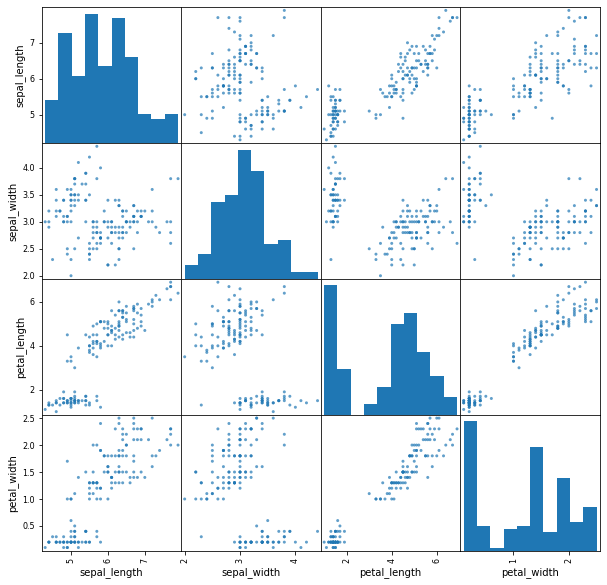

In [9]:
from pandas.plotting import scatter_matrix

data = df.drop(['target'],axis=1)

scatter_matrix(data, alpha=0.7, figsize=(10, 10), diagonal='hist');


### Estimar qualitativamente o valor da autocorrelação linear entre duas variaveis

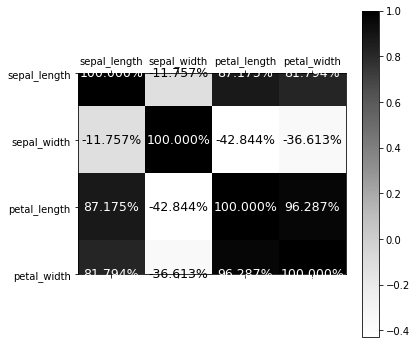

In [10]:
data = df.drop(['target'],axis=1)

classes = np.unique(df['target'].values)
#Iris Setosa 
#Iris Versicolour 
#Iris Virginica
class_labels = ['Setosa', 'Versicolour', 'Virginica']
m_colors = ['b', 'r', 'g']

corr = data.corr()

fig, ax = plt.subplots(figsize=(6, 6))
im = ax.matshow(corr, cmap=plt.cm.Greys)

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

# Loop over data dimensions and create text annotations.
for i in range(corr.shape[1]):
    for j in range(corr.shape[0]):
        if corr.values[i,j] < 0.5:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5)
        else:
            ax.annotate('%1.3f%%'%(100.*corr.values[i,j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center', fontsize=12.5, color='white')
                
        #text = ax.text(j, i, corr.values[i, j],ha="center", va="center", color="w")
fig.colorbar(im)

In [11]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
